### 데이터 분석 시 필요한 지식 및 코드 정리 

#### 결측치 탐색 및 제거

해당 레코드에 결측치가 있다고 반드시 제거를 해야하는 것은 아니다. 분석가의 주관적 개입을 최대한 배제하고 논리적 판단으로 대체하는 것을 권장한다. 

- pandas.DataFrame.isnull() : 결측치 여부를 True/False 값으로 반환. 결측치인 경우 True
- pandas.DataFrame.notnull() : 결측치 여부를 True/False값으로 반환. 실측치인 경우 True

- pandas.DataFrame.dropna(axis) : 결측치가 포함된 데이터를 제외하고 추출 (axis = 0 인 경우 결측치가 포함된 Index 삭제, 1인 경우 Column 삭제)   
- pandas.DataFrame.fillna("대체값")     : 결측치 데이터를 "대체값"으로 적용
    * fillna() 매서드의 method 인자값을 ["ffill", "pad"] 중 하나로 지정하여, 결측치 앞의 값으로 대체할 수 있음.
    * fillna() 매서드의 method 인자값을 ["bfill", "backfill"] 중 하나로 지정하여, 결측치 뒤의 값으로 대체할 수 있음.  

- numpy.where("조건", "조건 True 시 대체값","조건 False 시 대체값") : 새 Series 생성 시, 결측값의 여부에 따라 대체값을 다르게 지정 

#### 이상치 탐색 및 처리

##### 이상치 탐색 

이상치는 매우 크거나 작은 값으로 분석 결과에 혼동을 주는 요소이기 때문에 전처리 과정에서 삭제 또는 변환 과정을 거쳐야 한다.   
다만, 결측치와 달리 기준을 잡기가 모호하다. "얼마나 크고 작은 것을 이상치로 볼것인가?" 분석가의 역량이다. 

물론, 이상치를 정하는 기준은 꽤 정립이 되어있다. 

👑 사분범위를 이용한 Tukey Fences

IQR = 데이터 셋의 3사분위값과 1사분위값의 차이

```python
IQR = df.quantile(0.75)-df.quantile(0.25)
```

이 방법은 '1사분위 값 - IQR * 1.5'에 미달하거나 '3사분위 + IQR * 1.5'를 초과하는 값을 이상치라 판단한다. 

```python
Outlier = (df["column명"] < df["column명"].quantile(0.25) - IQR * 1.5) & (df["column명"] > df["column명"].quantile(0.75) + IQR * 1.5)
```

Tukey Fences 방법이 정형화된 기준이지만, 때에 따라서 분석가의 판단 또한 중요한 기준이 될 수 있다. 어느 분석이든 도메인 지식이 함께 융합되어야 더 현실적인 결과가 나오기 때문이다.   
이 방법은 간단하게 boxplot을 통하여 판단할 수도 있다. 대부분의 박스플롯은 이를 자동으로 포함 시키기 때문이다. 

👑 Z-score 방법

개인적으론 데이터의 분포도를 시각화하여 정규성을 파악해보는 것도 좋은 방법이라 생각한다.

```python
z score = (x - mean) / std.deviation 
```

위의 수학식을 통해 데이터를 표준정규화하고 특정 기준 (1.98, 2.56 등) 이상 이하를 넘는 것들을 이상치로 판단할 수도 있다. 

```python 
def outlier(df, col, z) :
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
```



##### 이상치 처리 

🎈이상치 삭제 

권고하는 방법은 아니다. 극단적인 값이라도 의미 있는 값이 될 수 있기 때문이다. 또한, 데이터가 많이 없다면 하나의 데이터도 소중하다.  

🎈이상치 대체 

하한값 / 상한값 결정 후 이보다 크고 작으면 하한값과 상한값으로 대체한다.     
중위수로 부터 n 편차 큰 값으로 대체 (이건 무슨말인지 모르겠음)  
평균의 표준편차 * n 범위를 초과하는 값일 경우 각 표준편차의 하한/상한값으로 지정   
해당 그룹의 평균으로 대체 등  

대체할 수 있는 방안은 무수히 많으나 ,, 사실 대체시 ,, 신뢰성이 떨어진다는 문제가 존재한다.  

#### Scaling 

데이터를 확인하면 데이터가 치우친 경우가 많다. 이때 치우친 정도를 확인하기 위해 skew() 매소드를 활용해본다. (0에 가까울 수록 어느쪽으로 치우치지 않다는 것)

너무 간격이 넓거나 좁은 것, 치우친 것들은 Scaling 작업을 통해 값을 조정한다. 좌로 치우쳐진 것은 지수곱을, 우로 치우친 것은 로그 등으로 넓혀준다. 


**스케일링을 하는 이유는 각 칼럼마다 스케일 차이가 나서 정확한 분석, 비교가 어려울 수 있기 때문이다. 특히 ML 학습에 문제가 생길 수도 있다.**


🎈 MinMax Scaling 

데이터의 전체 분포의 범위를 0~1 사이로 적용하는 방식이다. 

```python
MinMax_Scale = { (관측값 X) - (최소값 Min) } / { (최대값 Max) - (최소값 Min) }
```

🎈 표준화 

앞서 작성한 것처럼 해당 칼럼의 데이터를 모두 표준화하여 정규분포를 띄게 만드는 것이다. 

```python
z score = (x - mean) / std.deviation 
```


#### 원-핫 인코딩 

카테고리별 이진 특성을 만들어 해당 특성을 모두 1, 나머지는 0으로 만드는 것이다. 범주형 데이터를 만들때 사용하는 방법니다. 

예를 들어 '국가'라는 칼럼이 있다. 이 칼럼 속 값들을 다시 칼럼으로 만들어 예, 아니오를 값으로 만들고 싶다. 

```python 
country = pd.get_dummies(df['국가'])
```

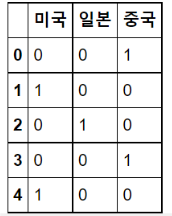

#### 구간화

데이터를 구간 별로 나눌때 사용하는 기법을 구간화라고 한다. 연속적인 데이터(히스토그램)을 구간을 나누어서 분석할 때 주로 사용한다. 

[구간화 방법 블로그](https://iambeginnerdeveloper.tistory.com/30)

#### 통계확용 매서드 

 pandas.DataFrame["column명"].descrbe(): DataFrame 데이터 중 계산 가능한 값만 추출하여 평균, 최대, 최소치 값 등

                                                        출력. 특정 필드값에 대한 통계값 출력 지원

 pandas.DataFrame["column명"].count() : DataFrame의 특정 필드의 통계 수 정보 표시

 pandas.DataFrame["column명"].max()   :  DataFrame의 특정 필드의 최대값 정보 표시

 pandas.DataFrame["column명"].min()   :  DataFrame의 특정 필드의 최소값 정보 표시

 pandas.DataFrame["column명"].nlargest(n)   :  DataFrame의 특정 필드 중 최대값 n개 표시

 pandas.DataFrame["column명"].nsmallest(n)   :  DataFrame의 특정 필드 중 최소값 n개 표시

 pandas.DataFrame["column명"].sum()   : DataFrame의 특정 필드값의 총합 정보 표시

 pandas.DataFrame["column명"].mean() :  DataFrame의 특정 필드값의 평균값 정보 표시

 pandas.DataFrame["column명"].median() :  DataFrame의 특정 필드값의 중간값 정보 표시

 pandas.DataFrame["column명"].mad()   : DataFrame의 특정 필드값의 평균 편차 정보 표시. 편차는 절대값(Abs) 사용.

 pandas.DataFrame["column명"].var()     : DataFrame의 특정 필드값의 분산 정보 표시(N-1 정규화)

 pandas.DataFrame["column명"].std()     : DataFrame의 특정 필드값의 표준 편차 정보 표시(분산^(1/2))

 pandas.DataFrame["column명"].skew()   : DataFrame의 특정 필드값이 치우친 정도(Skewness)를 표시

 pandas.DataFrame["column명"].kurtosis() : DataFrame의 특정 필드값의 정규 분포를 벗어나는 이상치 수량 정보 표시

 pandas.DataFrame["column명"].unique() : DataFrame의 특정 필드값의 고유값 정보만 표시

 pandas.DataFrame["column명"].value_counts() : DataFrame의 특정 필드값의 고유값 사용 수량 정보 표시

 pandas.DataFrame["column명"].nunique() : DataFrame의 특정 필드값의 고유값 갯수 정보만 표시

 pandas.DataFrame["column명"].duplicated() : DataFrame의 특정 필드값이 중복되는 값을 가지는지 여부를 표시

 pandas.DataFrame["column명"].drop_duplicates() : DataFrame의 특정 필드값 중 중복값은 제외하고 표시

### 참고 사이트 

https://iambeginnerdeveloper.tistory.com/30  
https://whitewing4139.tistory.com/175